In [2]:
#import packages
from importlib.resources import Package
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import os

# import custom Package
sys.path.append(os.path.abspath(os.path.join("../scripts")))
import data_loader
import ploting_utils
import hypothesis_test

Extract Data

In [3]:
df = data_loader.load_data('../data/AdSmartABdata.csv')

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8077 entries, 0 to 8076
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   auction_id   8077 non-null   object
 1   experiment   8077 non-null   object
 2   date         8077 non-null   object
 3   hour         8077 non-null   int64 
 4   device_make  8077 non-null   object
 5   platform_os  8077 non-null   int64 
 6   browser      8077 non-null   object
 7   yes          8077 non-null   int64 
 8   no           8077 non-null   int64 
dtypes: int64(4), object(5)
memory usage: 568.0+ KB


## Checking some information about the dataset

In [5]:
data_loader.data_shape(df)

 There are 8077 rows and 9 columns


In [6]:
data_loader.data_types(df)

object    5
int64     4
dtype: int64

In [7]:
data_loader.percent_missing(df)

The dataset contains 0.0 % missing values.


# Plotting categorical variables

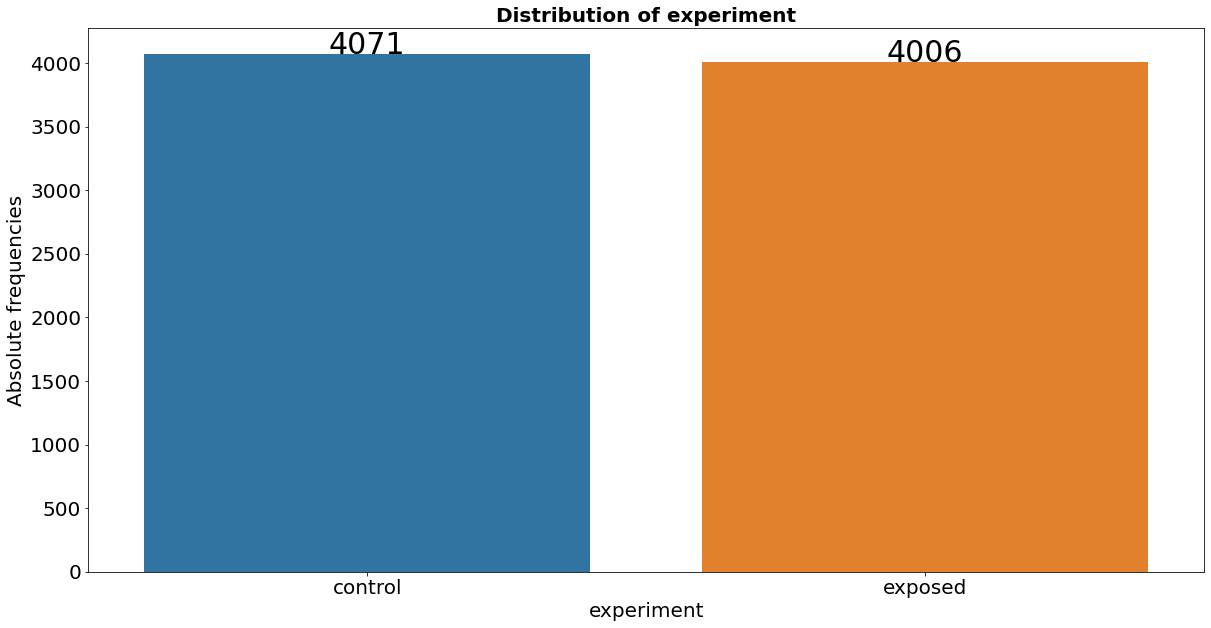

In [8]:
ploting_utils.plot_count(df, 'experiment')

The two groups (exposed and control) of users have approximately the same size.

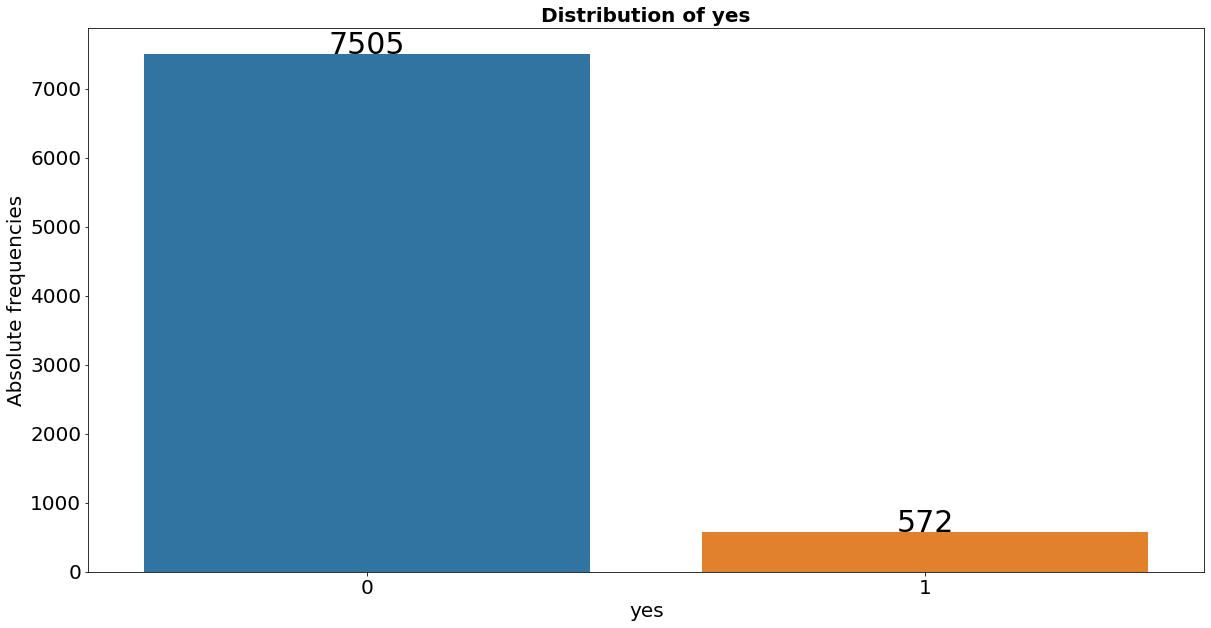

In [9]:
ploting_utils.plot_count(df, 'yes')


7.08% (572) of the users knows the brand Lux, according to the responses.

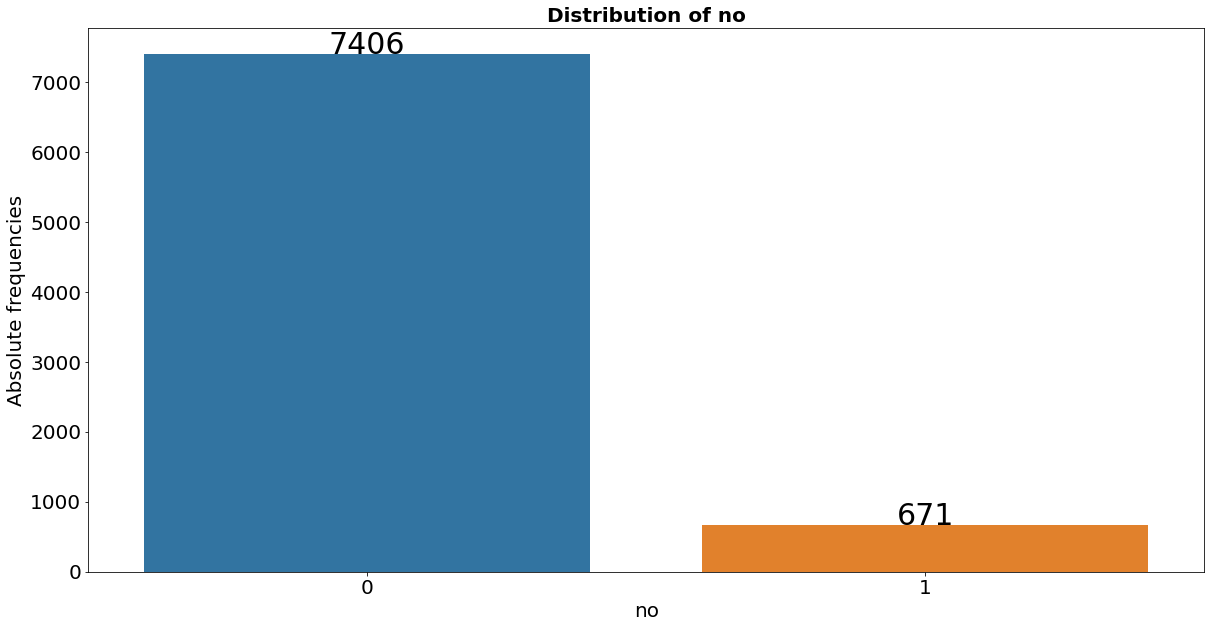

In [10]:
ploting_utils.plot_count(df, 'no')


8.31% of the users does not know the brand Lux according to the responses.

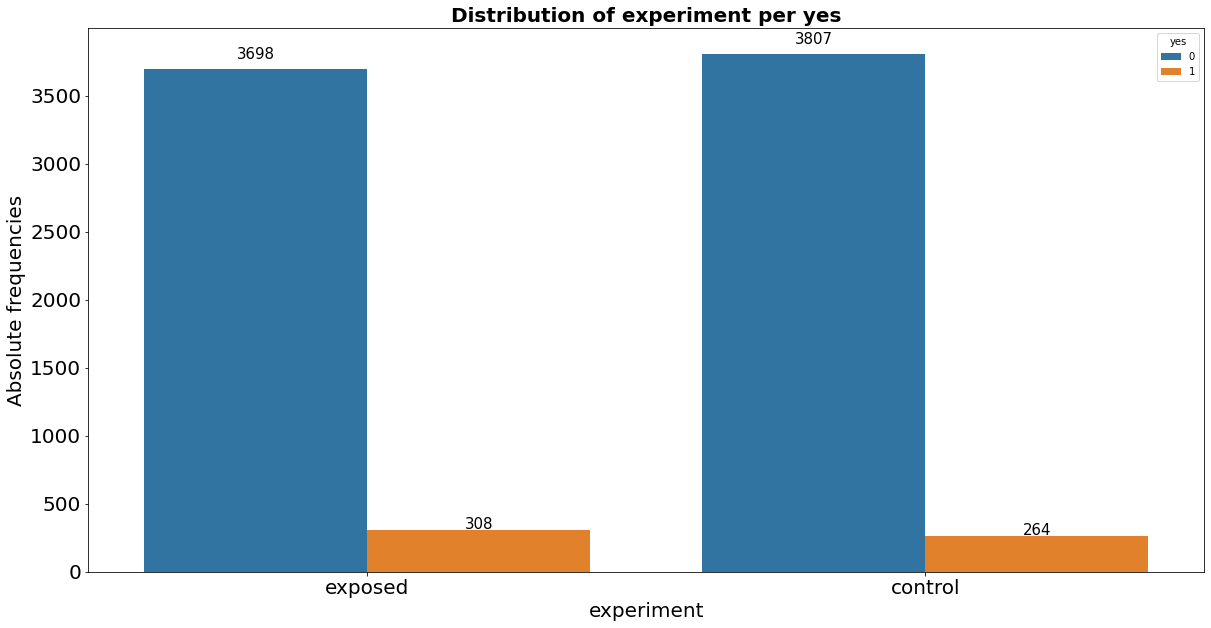

In [11]:
ploting_utils.multi_plot_count(df, 'experiment', 'yes')


7.68% (308 over 4006) of the exposed users knows the brand Lux while 6.48% (264 over 4071) of the controled users knows the brand.

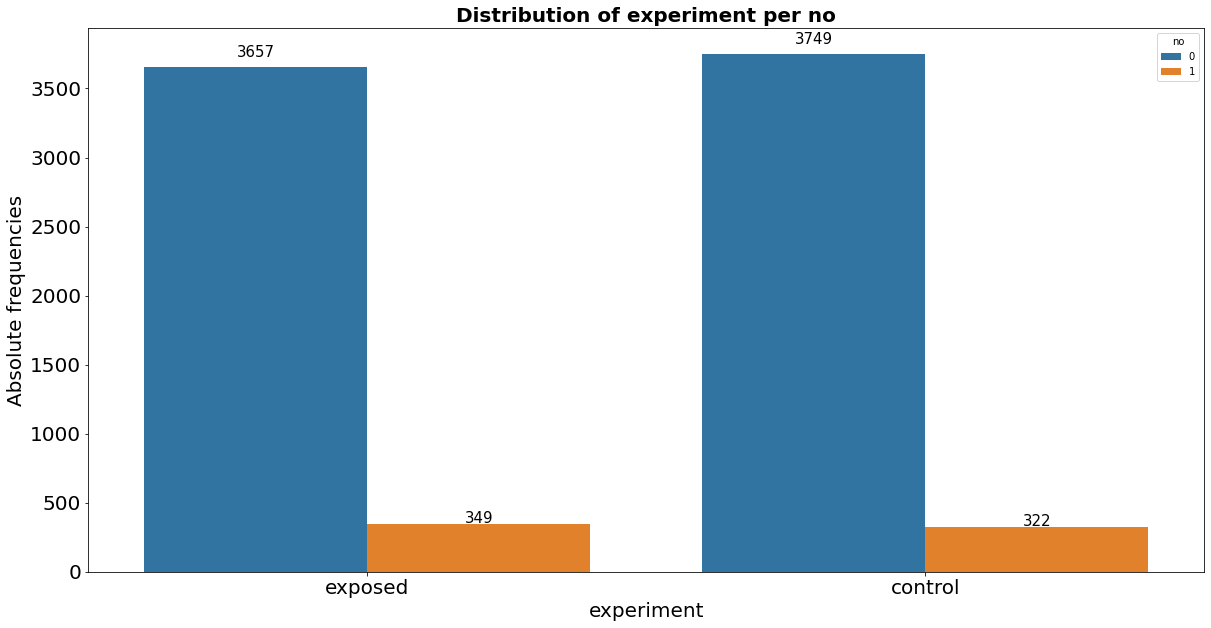

In [12]:
ploting_utils.multi_plot_count(df, 'experiment', 'no')


8.71% (349 over 4006) of the exposed users does not know the brand Lux while 7.91% (322 over 4071) of the controled users does not know the brand.

## Browser, devise_make and platform_os top values distribution

In [13]:
df['browser'].value_counts()

Chrome Mobile                 4554
Chrome Mobile WebView         1489
Samsung Internet               824
Facebook                       764
Mobile Safari                  337
Chrome Mobile iOS               51
Mobile Safari UI/WKWebView      44
Chrome                           3
Pinterest                        3
Opera Mobile                     3
Opera Mini                       1
Edge Mobile                      1
Android                          1
Firefox Mobile                   1
Puffin                           1
Name: browser, dtype: int64

In [14]:
df['device_make'].value_counts()

Generic Smartphone     4743
iPhone                  433
Samsung SM-G960F        203
Samsung SM-G973F        154
Samsung SM-G950F        148
                       ... 
Samsung SM-A505F          1
D5803                     1
Samsung SM-G6100          1
HTC M10h                  1
XiaoMi Redmi Note 5       1
Name: device_make, Length: 270, dtype: int64

In [15]:
df['platform_os'].value_counts()

6    7648
5     428
7       1
Name: platform_os, dtype: int64

In [16]:
top_browsers = data_loader.top_values(df, 'browser', 5)
top_devices = data_loader.top_values(df, 'device_make', 5)
top_platforms = data_loader.top_values(df, 'platform_os', 2)


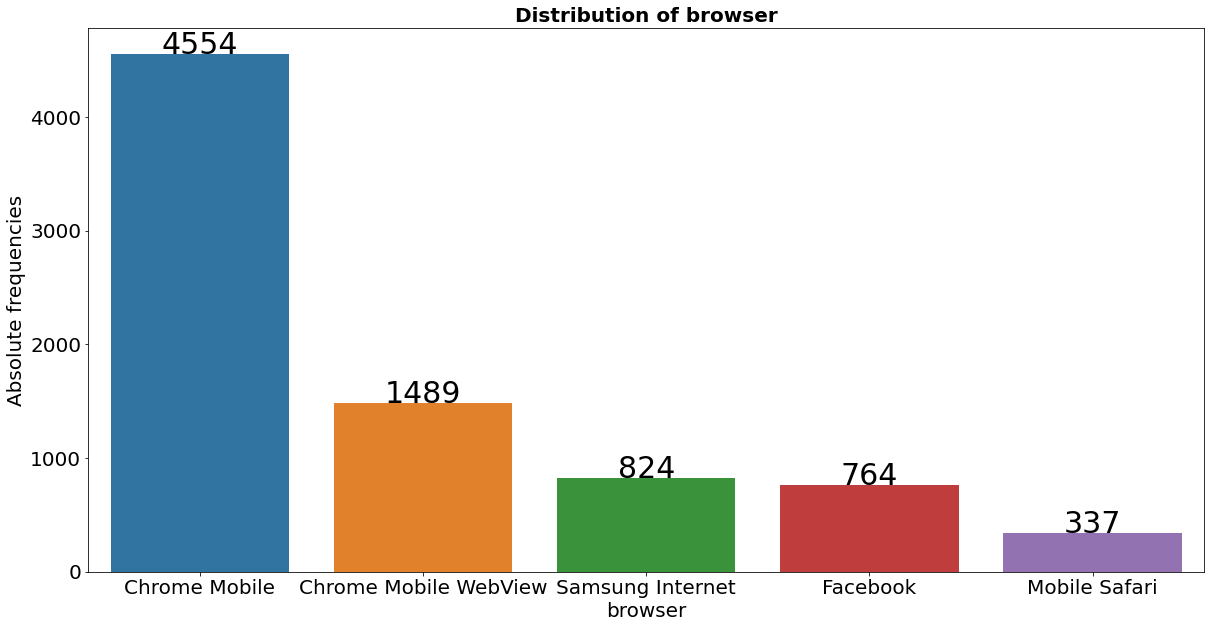

In [17]:
ploting_utils.plot_count(top_browsers, 'browser')


The top 5 browsers used by the users are: Chrome Mobile, Chrome Mobile WebView, Samsung Internet, Facebook and Mobile Safari.

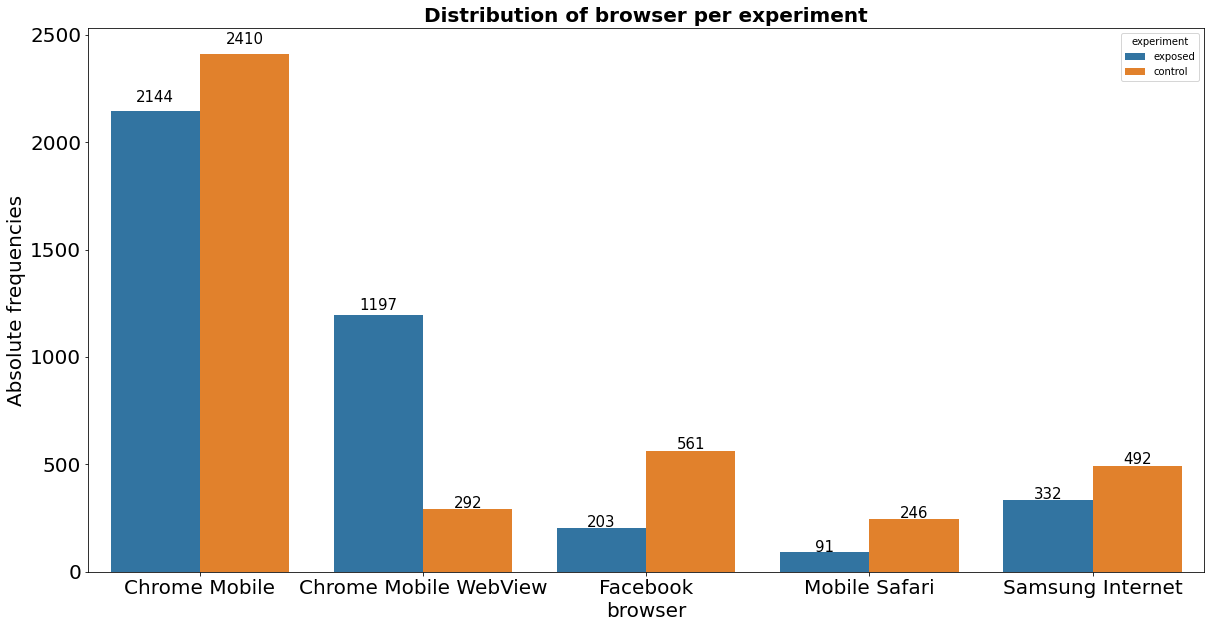

In [18]:
ploting_utils.multi_plot_count(top_browsers, 'browser', 'experiment')

Between people using Chrome Mobile browser, there are more controled people than exposed people. This is the case of those using Facebook browser, Mobile Safari and Samsung Internet as well. But between people using Chrome Mobile WebView, there are more exposed people than controled people.

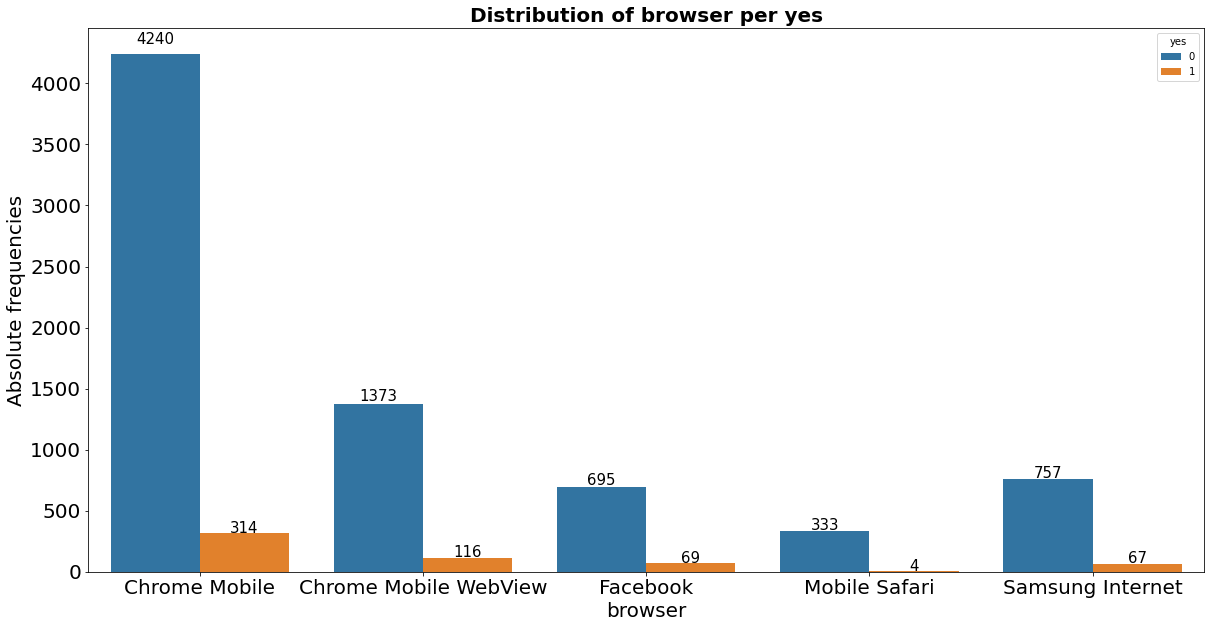

In [19]:
ploting_utils.multi_plot_count(top_browsers, 'browser', 'yes')

No matter the browser used between the top 5, there are more people who don't know the brand Lux than people who know it.

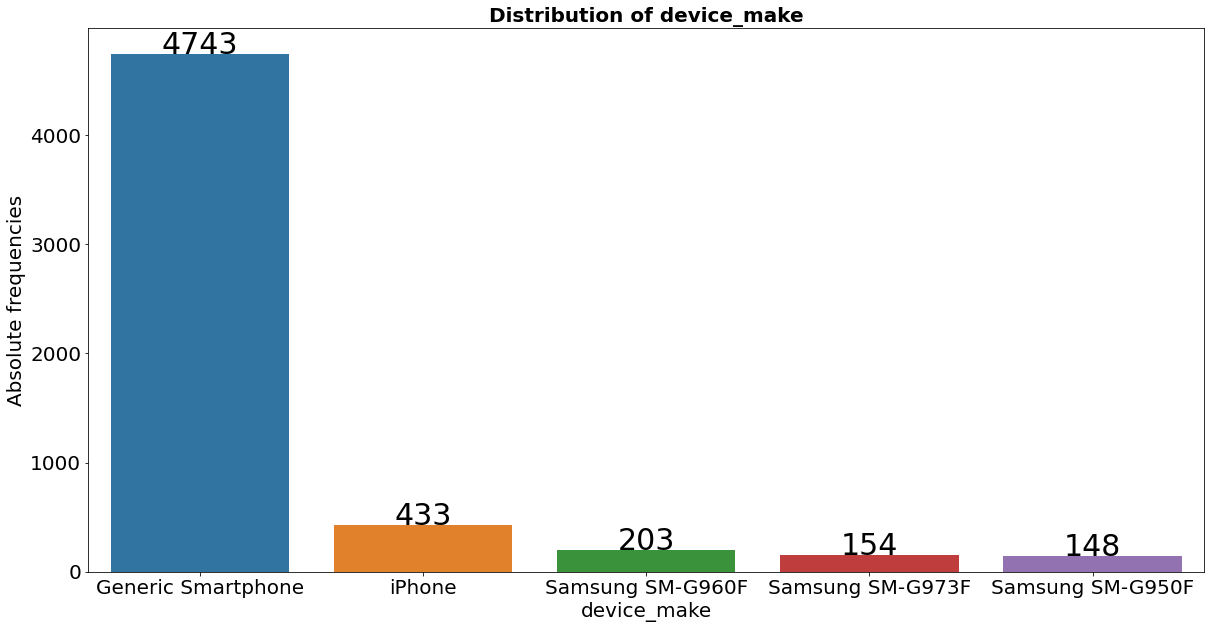

In [20]:
ploting_utils.plot_count(top_devices, 'device_make')

The top 5 devices used by the users are: Generic Smartphone, iPhone, Samsung SM-G960F. Samsung SM-G973F and Samsung SM-G950F.

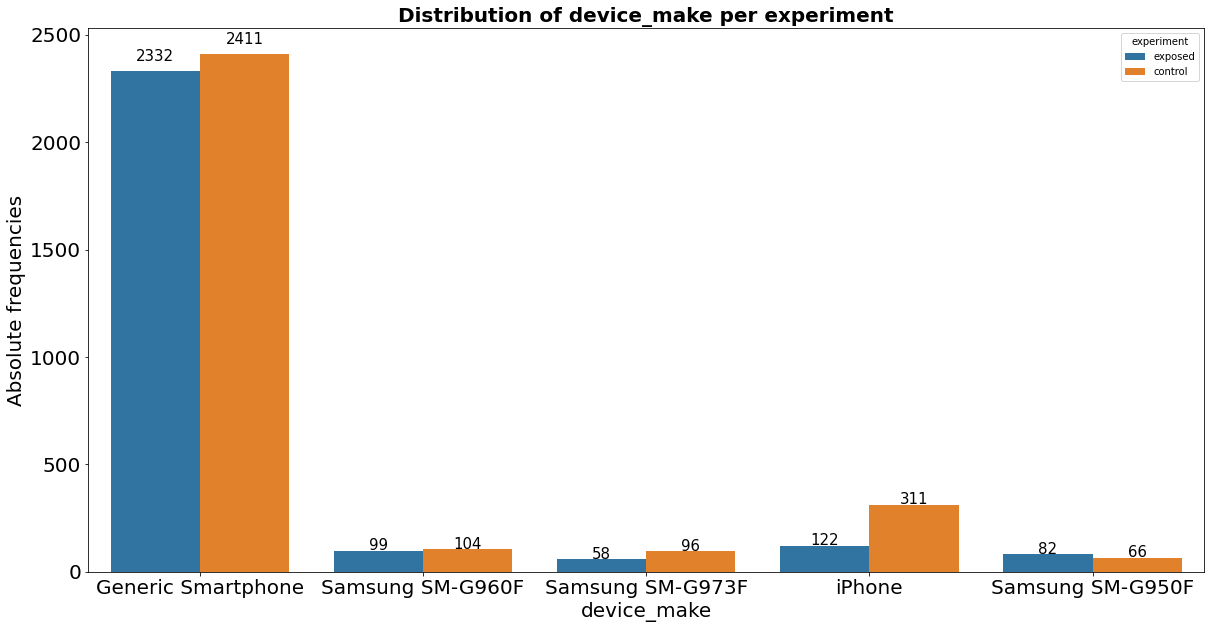

In [21]:
ploting_utils.multi_plot_count(top_devices, 'device_make', 'experiment')

Controled users are mostly using the first 4 devices than exposed users but the difference is not too high.

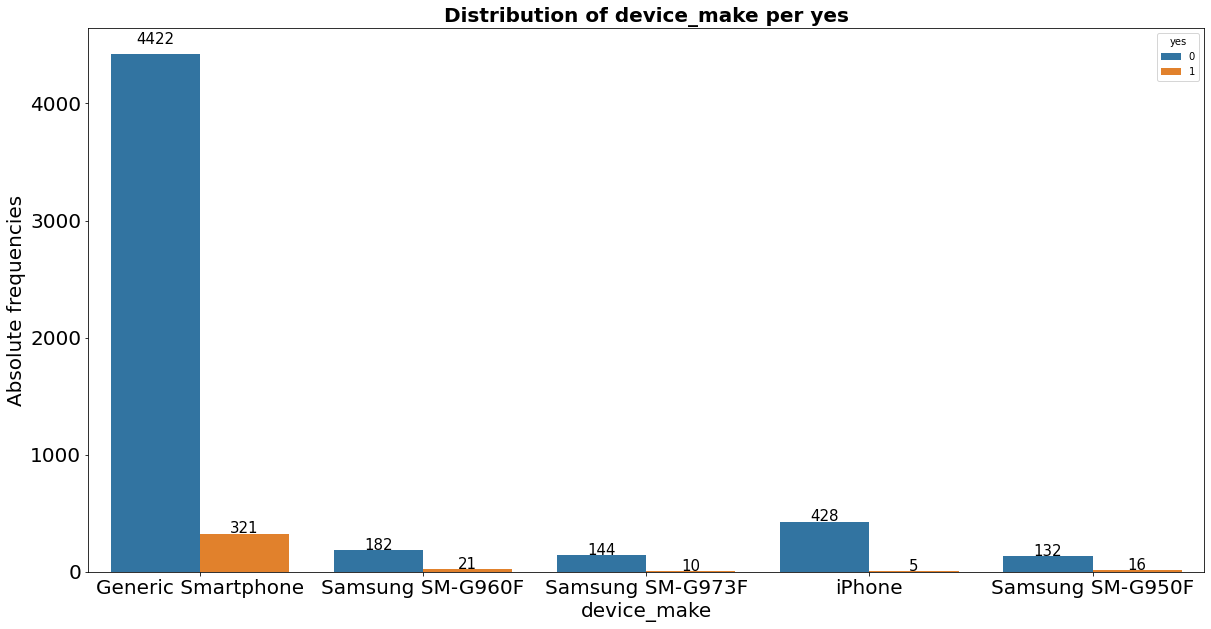

In [22]:
ploting_utils.multi_plot_count(top_devices, 'device_make', 'yes')

No matter the device used between the top 5, there are more people who don't know the brand Lux than people who know it.

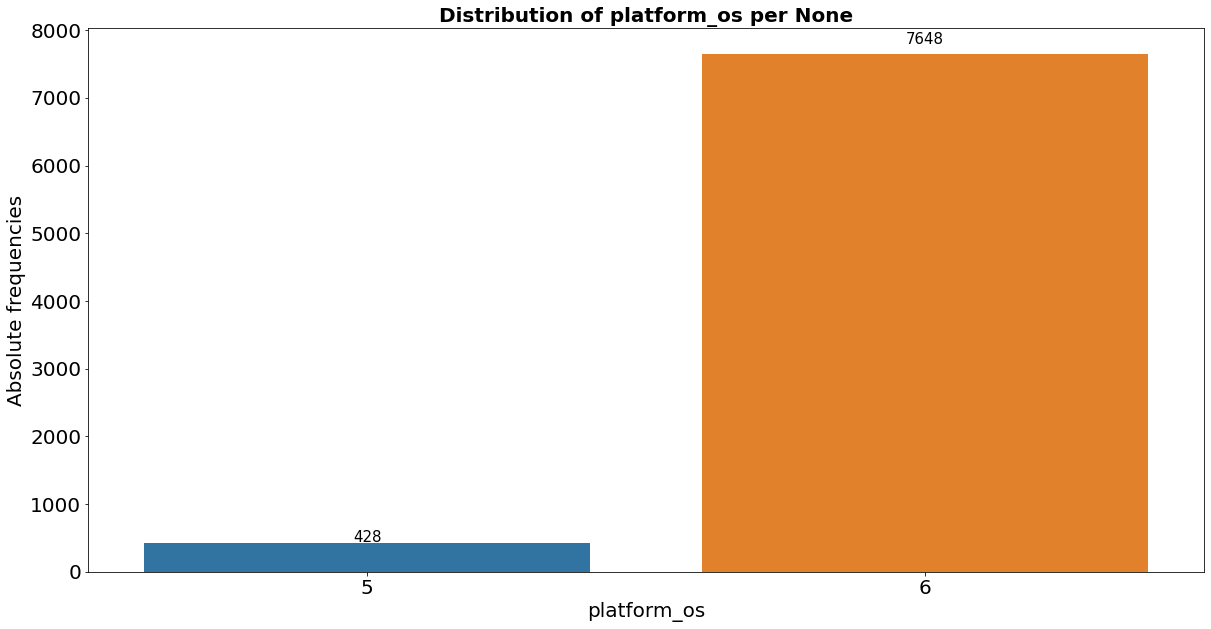

In [23]:
ploting_utils.multi_plot_count(top_platforms, 'platform_os', None)

The two os platform mostly represented are the ones with the codes 6 and 5 and the platform coded 6 is the most frequent platform.

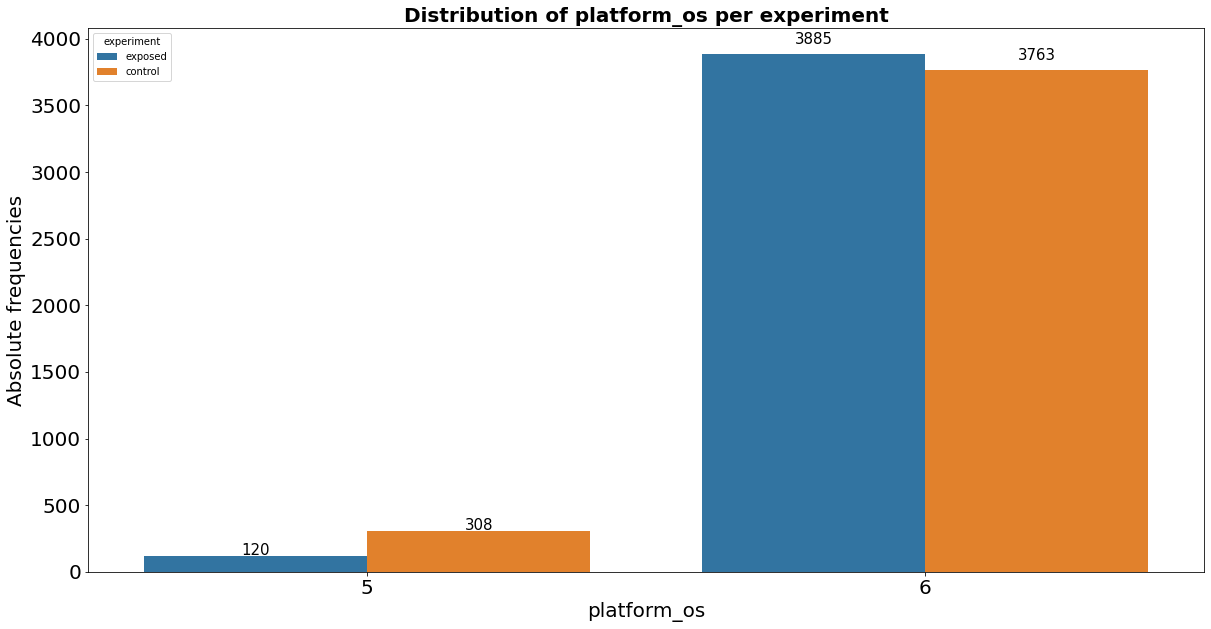

In [24]:
ploting_utils.multi_plot_count(top_platforms, 'platform_os', 'experiment')

Between people using the platform coded 5, there are more controled people while between people using the one coded 6 they are more exposed people. However, the differences are not really significant.

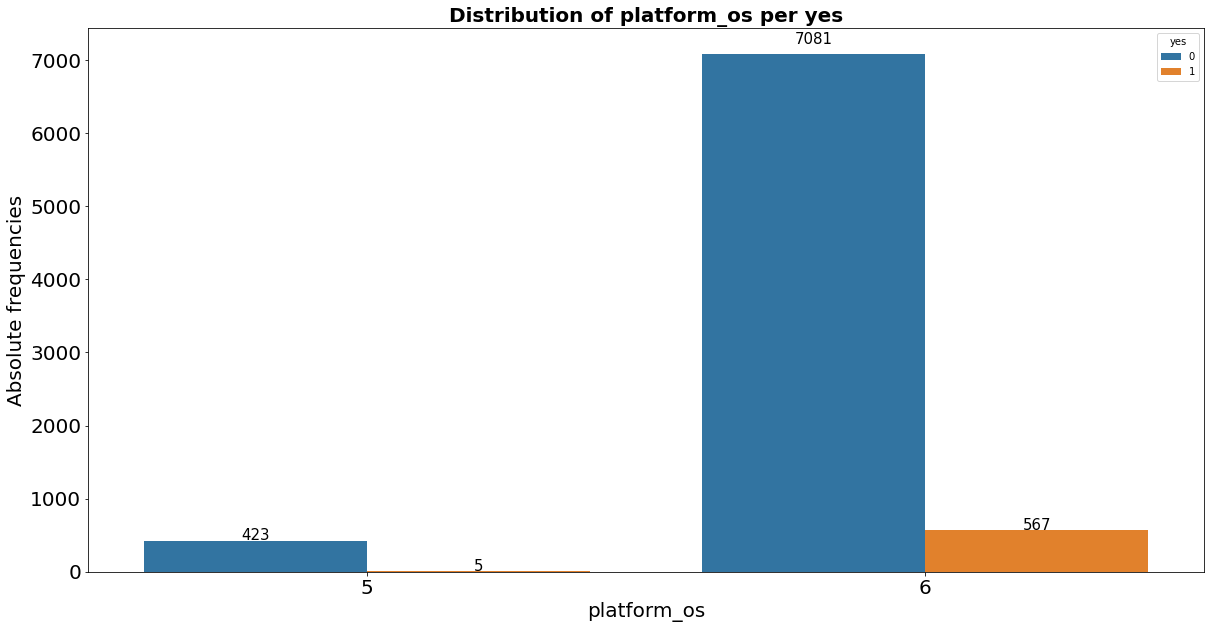

In [25]:
ploting_utils.multi_plot_count(top_platforms, 'platform_os', 'yes')

No matter the os platform used, there are more people who don't know the brand Lux than people who know it.